<a href="https://colab.research.google.com/github/ganaperkasa/PCVK_Ganjil_2024/blob/main/Praktikum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


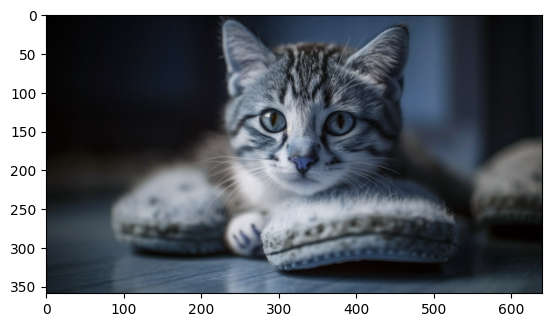

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

img = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
plt.imshow(img)

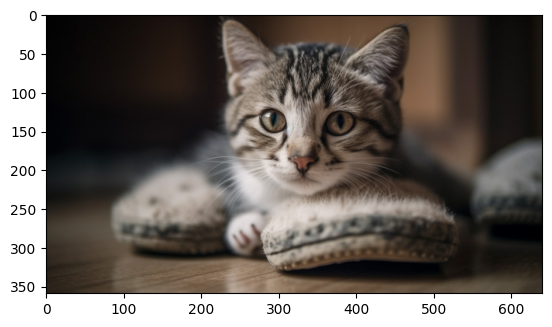

In [6]:
img2 = img
img3 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img3)


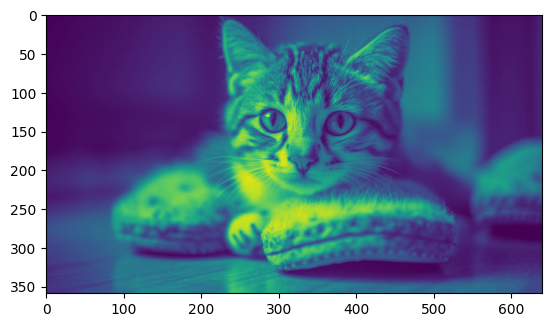

In [8]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

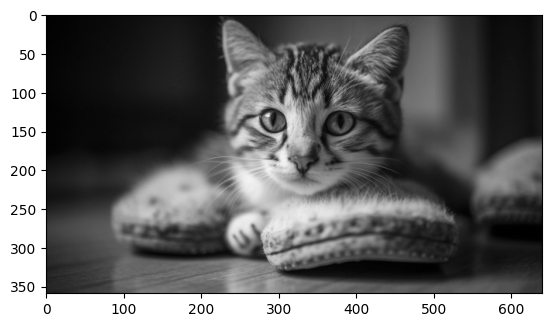

In [9]:
plt.imshow(img_gray, cmap='gray')

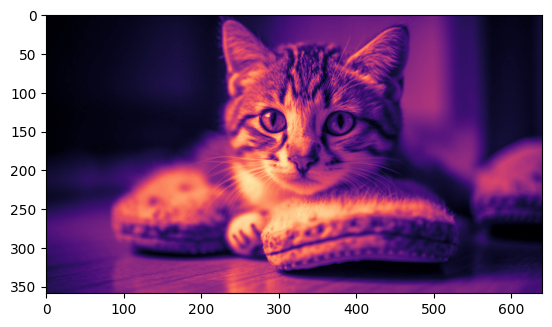

In [10]:
plt.imshow(img_gray, cmap='magma')

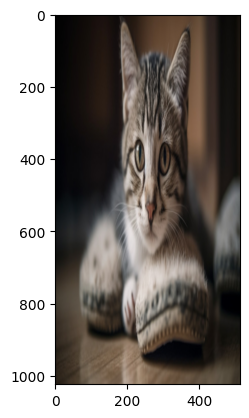

In [11]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

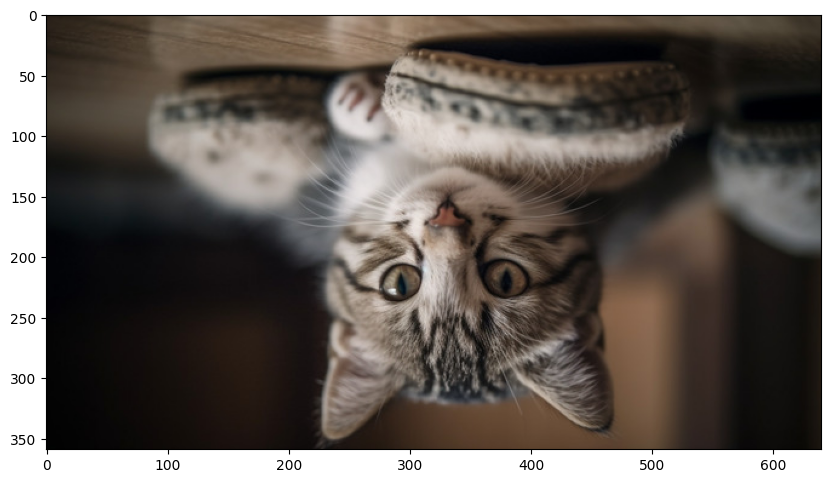

In [12]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(img5)

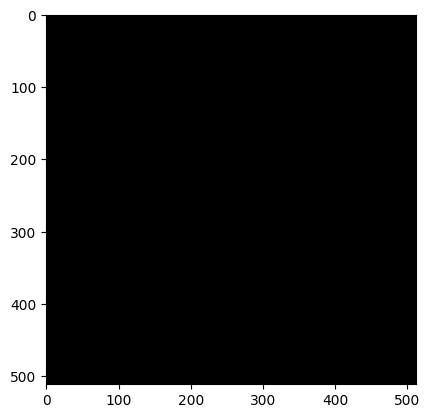

In [13]:
black_img = np.zeros(shape=[512, 512, 3], dtype=np.int16)
plt.imshow(black_img)


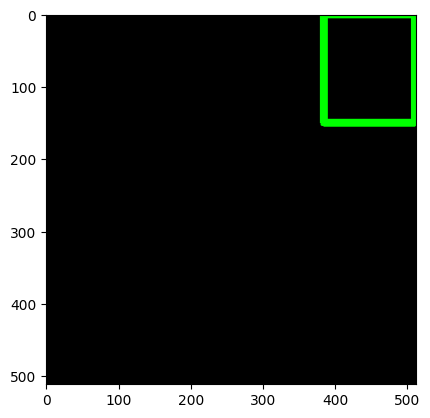

In [14]:
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)
plt.imshow(black_img)

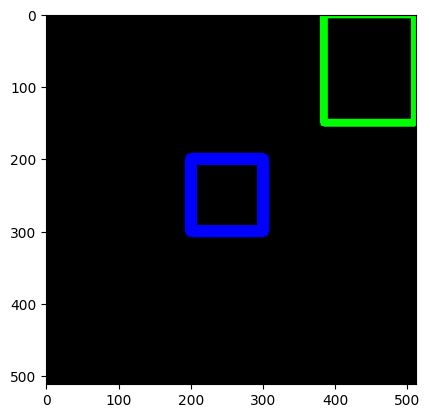

In [15]:

cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)
plt.imshow(black_img)


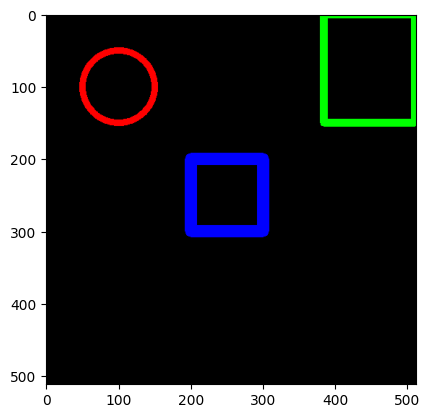

In [16]:
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)
plt.imshow(black_img)



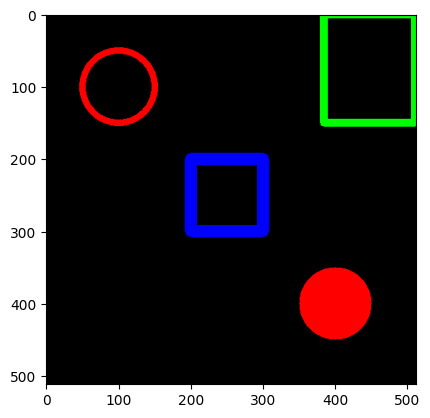

In [17]:
cv.circle(black_img, center=(400,400), radius=50, color=(255,0,0), thickness=-1)
plt.imshow(black_img)

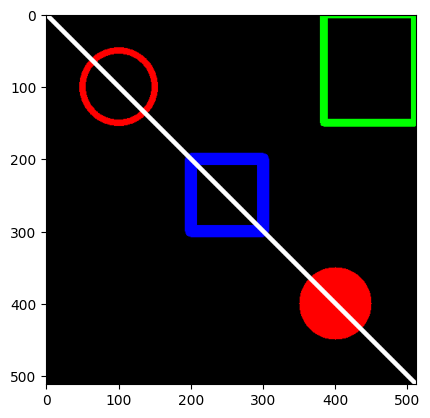

In [21]:
cv.line(black_img, pt1=(0, 0), pt2=(512, 512), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

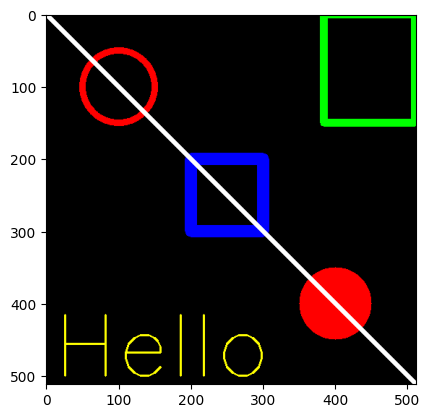

In [22]:

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

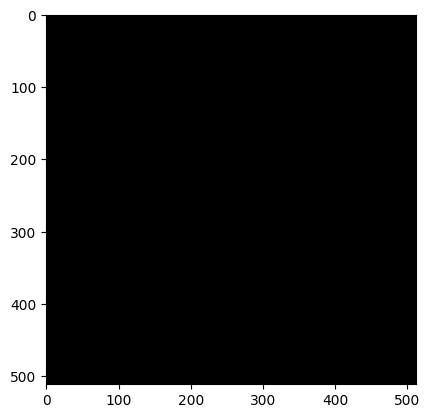

In [23]:
black_img2=np.zeros(shape=[512, 512, 3], dtype=np.int32)
plt.imshow(black_img2)

In [24]:

vertices = np.array([[100, 300], [200, 200], [400, 300], [200, 400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [25]:

pts = vertices.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

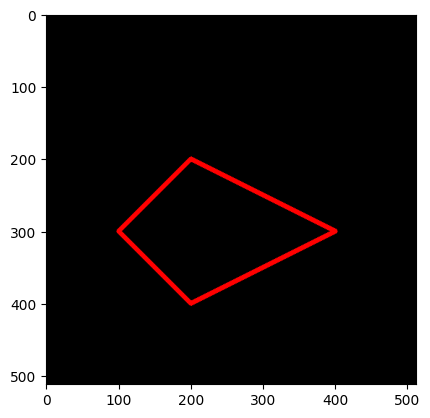

In [26]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(black_img2)

TUGAS

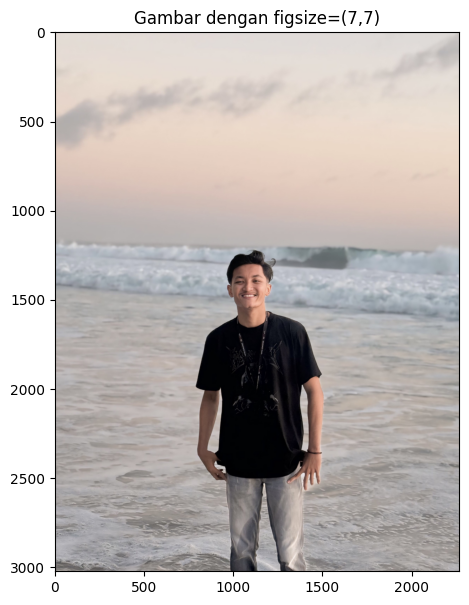

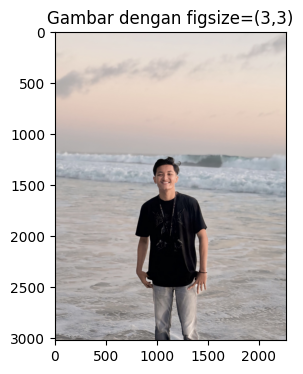

Ukuran pixel gambar: (3023, 2267)


In [27]:
import matplotlib.pyplot as plt
import cv2

# Baca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/foto.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar dengan figsize berbeda
plt.figure(figsize=(7,7))
plt.imshow(img_rgb)
plt.title("Gambar dengan figsize=(7,7)")
plt.show()

plt.figure(figsize=(3,4))
plt.imshow(img_rgb)
plt.title("Gambar dengan figsize=(3,3)")
plt.show()

# Periksa ukuran pixel gambar
print(f"Ukuran pixel gambar: {img.shape[:2]}")

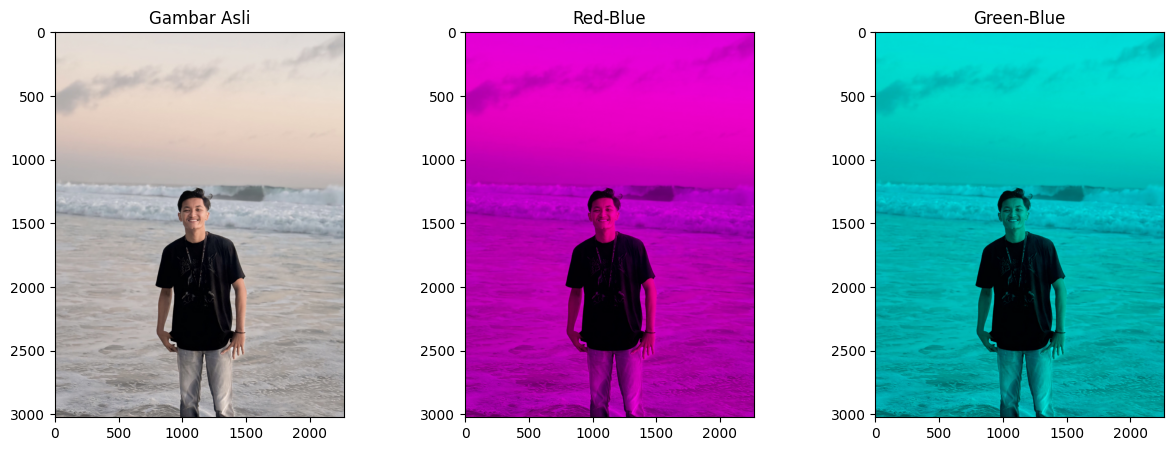

In [28]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/foto.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Buat salinan gambar untuk Red-Blue dan Green-Blue
red_blue = img_rgb.copy()
green_blue = img_rgb.copy()

# Set channel Green ke 0 untuk Red-Blue
red_blue[:,:,1] = 0

# Set channel Red ke 0 untuk Green-Blue
green_blue[:,:,0] = 0

# Tampilkan gambar
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(img_rgb)
plt.title("Gambar Asli")

plt.subplot(132)
plt.imshow(red_blue)
plt.title("Red-Blue")

plt.subplot(133)
plt.imshow(green_blue)
plt.title("Green-Blue")

plt.show()

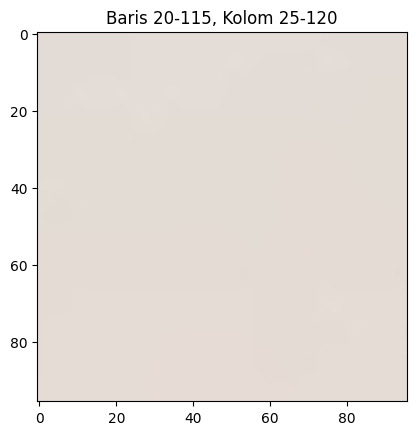

In [29]:
cropped_img = img_rgb[20:116, 25:121]
plt.imshow(cropped_img)
plt.title("Baris 20-115, Kolom 25-120")
plt.show()

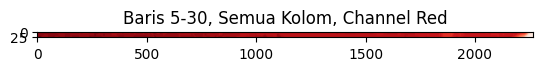

In [30]:
red_channel = img_rgb[5:31, :, 0]
plt.imshow(red_channel, cmap='Reds')
plt.title("Baris 5-30, Semua Kolom, Channel Red")
plt.show()

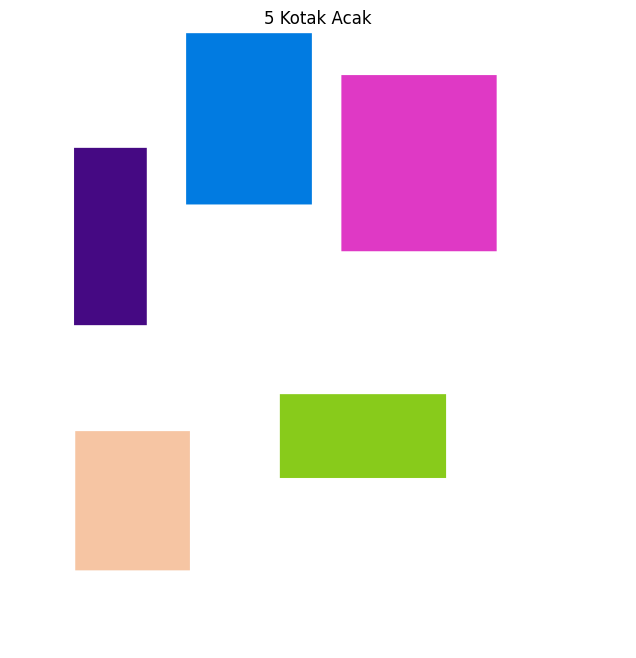

In [32]:
# Buat canvas berwarna putih dengan ukuran 500x500 piksel
canvas = np.ones((500, 500, 3), dtype=np.uint8) * 255

# Fungsi untuk menghasilkan warna acak
def random_color():
    return tuple(np.random.randint(0, 256, 3).tolist())

# Fungsi untuk mengecek apakah dua kotak tumpang tindih
def check_overlap(x1, y1, x2, y2, existing_boxes):
    for box in existing_boxes:
        if not (x2 < box[0] or x1 > box[2] or y2 < box[1] or y1 > box[3]):
            return True
    return False

# Simpan kotak yang sudah digambar untuk mencegah tumpang tindih
existing_boxes = []

# Buat 5 kotak acak tanpa tumpang tindih
for _ in range(5):
    while True:
        # Posisi acak untuk sudut kiri atas (x1, y1) dan ukuran acak (w, h)
        x1, y1 = np.random.randint(0, 350, 2)
        w, h = np.random.randint(50, 150, 2)
        x2, y2 = x1 + w, y1 + h

        # Cek apakah kotak ini tumpang tindih dengan kotak yang sudah ada
        if not check_overlap(x1, y1, x2, y2, existing_boxes):
            break

    # Warna acak untuk kotak
    color = random_color()

    # Simpan koordinat kotak yang sudah digambar
    existing_boxes.append((x1, y1, x2, y2))

    # Gambar kotak dengan warna acak
    cv2.rectangle(canvas, (x1, y1), (x2, y2), color, -1)

# Tampilkan hasil
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.title("5 Kotak Acak")
plt.axis('off')
plt.show()

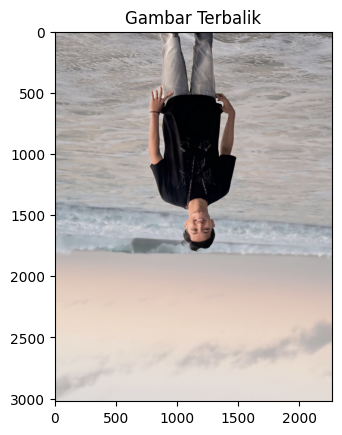

In [33]:
flipped_img = cv2.flip(img_rgb, -1)  # -1 untuk flip horizontal dan vertikal
plt.imshow(flipped_img)
plt.title("Gambar Terbalik")
plt.show()

Text(0.5, 1.0, 'Rectangle dan Circle pada bagian wajah')

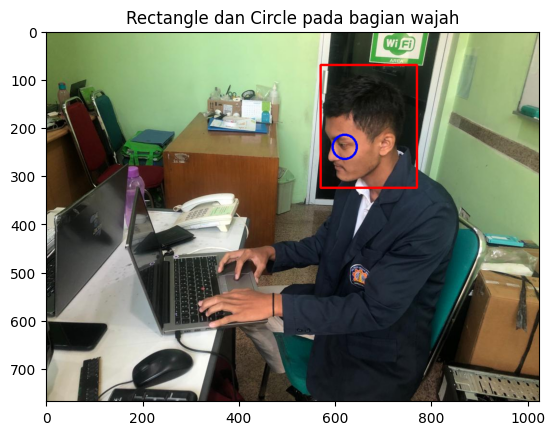

In [56]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/kegiatan.jpg')

cv2.rectangle(image, pt1=(570, 70), pt2=(770, 325), color=(0, 0, 255), thickness=4)

# Draw a circle on the eye (adjusting the coordinates)
cv2.circle(image, center=(620, 240), radius=25, color=(255, 0, 0), thickness=4)

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Rectangle dan Circle pada bagian wajah')

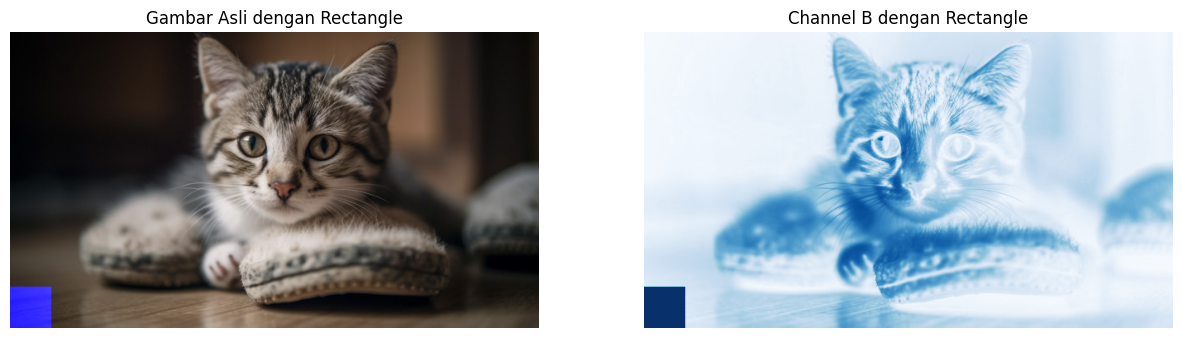

In [57]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ukuran rectangle
rect_size = 50

# Tambahkan rectangle pada channel B
img_rgb[-rect_size:, :rect_size, 2] = 255  # Warna putih pada channel B

# Tampilkan hasil
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.imshow(img_rgb)
ax1.set_title("Gambar Asli dengan Rectangle")
ax1.axis('off')

ax2.imshow(img_rgb[:,:,2], cmap='Blues')
ax2.set_title("Channel B dengan Rectangle")
ax2.axis('off')

plt.show()

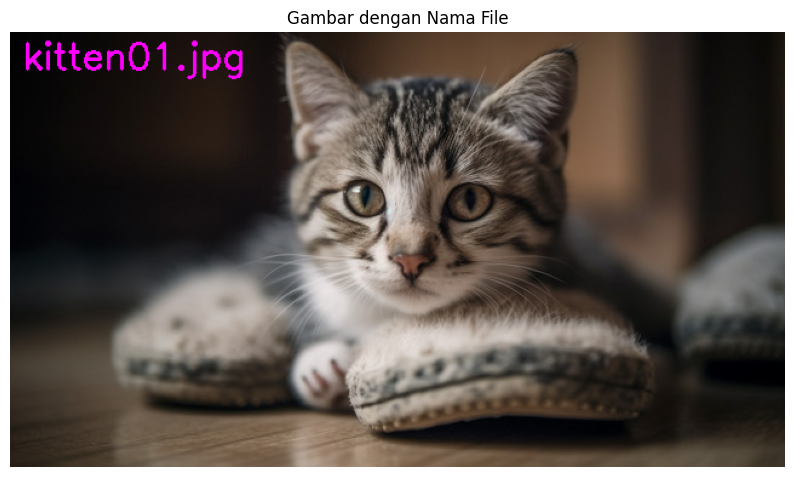

In [59]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Nama file
filename = "kitten01.jpg"

# Pengaturan font
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 0, 255)  # warna pink
font_thickness = 2

# Posisi teks (pojok kiri atas)
text_position = (10, 30)

# Tambahkan teks ke gambar
cv2.putText(img_rgb, filename, text_position, font, font_scale, font_color, font_thickness)

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title("Gambar dengan Nama File")
plt.axis('off')
plt.show()

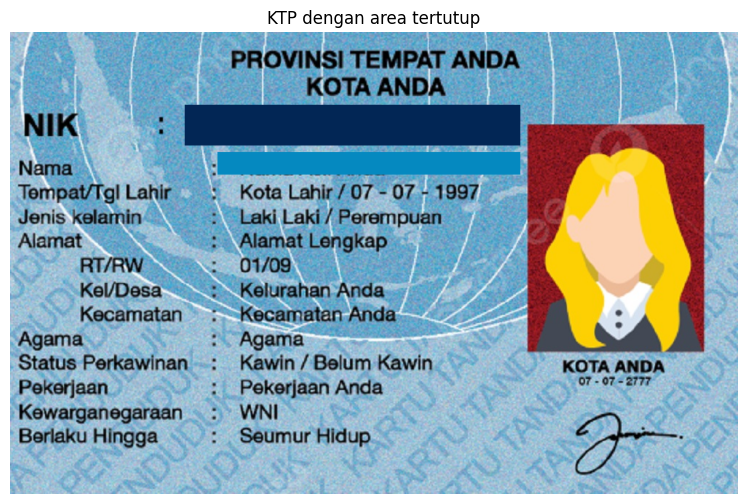

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/PCVK/Images/ktp.jpg'
original_image = cv2.imread(image_path)

def tutup_area(img, top_left, bottom_right):
    x1, y1 = top_left
    x2, y2 = bottom_right
    warna_random = np.random.randint(0, 256, size=(3,)).tolist()
    cv2.rectangle(img, (x1, y1), (x2, y2), warna_random, -1)

# List area yang mau ditutup
area_ditutp = {
    'NIK': ((240, 100), (700, 155)),
    'Nama': ((285, 165), (700, 195)),
}

modified_image = original_image.copy()

for coordinates in area_ditutp.values():
    tutup_area(modified_image, coordinates[0], coordinates[1])

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('KTP dengan area tertutup')
plt.axis('off')
plt.show()